<a href="https://colab.research.google.com/github/Azzimihr/ml-lab/blob/main/domaci1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Biblioteke

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Ucitavanje skupa podataka

Empty DataFrame
Columns: [X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area]
Index: []


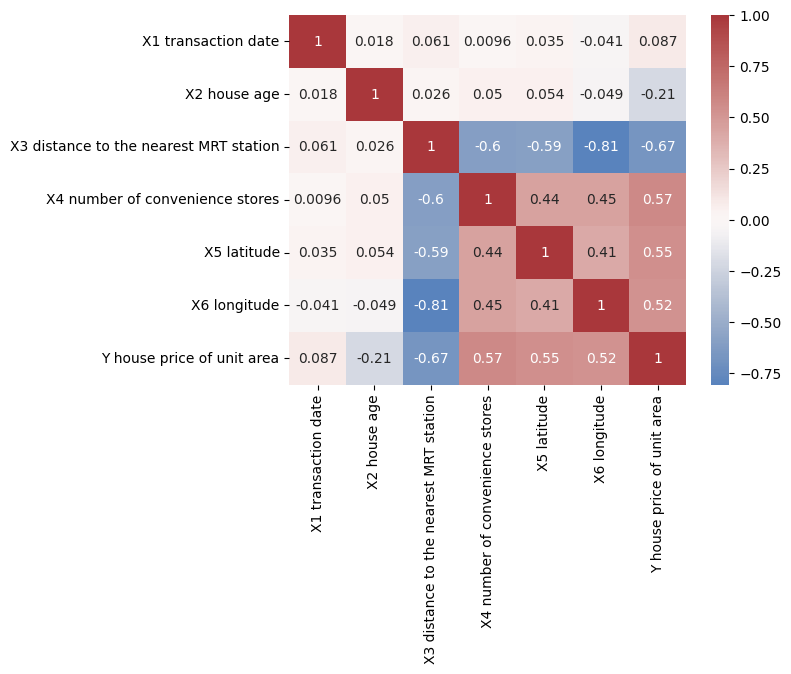

In [118]:
data = pd.read_csv("Real estate.csv").drop(columns="No")
cor = data.corr()
sns.heatmap(cor,annot=True,cmap="vlag",center=0)
print(data.head(0))

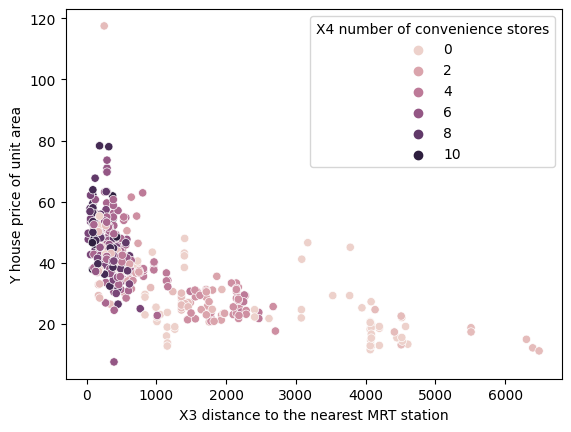

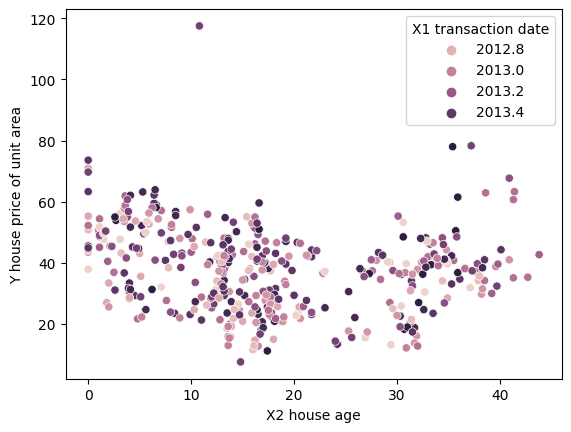

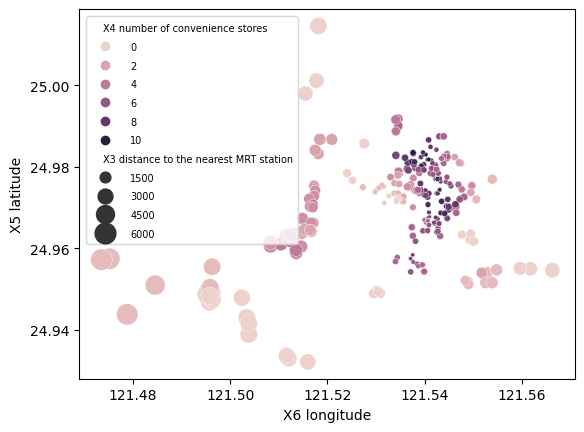

In [141]:
def col(a):
  return data.iloc[:,a-1]

# vidimo iz data.corr da postoji obrnuta korelacija izmedju razdaljine od
# najblize metro stanice (X3) i broja prodavnica (X4), a to je i ocekivano jer
# jedno raste a drugo opada u zavisnosti od gustine naseljenosti.
# cena kvadrata (Y) takodje raste zbog gustine, pa je pozitivno korelisana sa X4 i negativno sa X3
sns.scatterplot(data, x=col(3), y=col(7), hue=col(4))
plt.show()
# grafik je neka hiperbola sto je logicno zbog negativne korelacije
# ovaj grafik je dobar aranzman ove 3 kolone jer da smo koristili X4 na nekoj osi dobili bi stubove

# mozemo proveriti i neke blaze korelacije
sns.scatterplot(data, x=col(2), y=col(7), hue=col(1))
plt.show()
# grafik je vrlo haotican ali moze se procitati povezanost starosti (X2) i Y
# za X2 e (0,25) postoji blaga negatvna korelacija sa Y, verovatno veca od -0.21
# za X2 e (25,+inf) postoji malo jaca pozitivna korelacija
# ovde se takodje vidi da datum kupovine (X1) nema korelacije ni sa cim

# mozemo pogledati i kartu koja se dobija ubacivanjem geo. sirine (X5) i duzine (X6)
a=sns.scatterplot(data, x=col(6), y=col(5), hue=col(4), size=col(3), sizes=(7,240))
plt.setp(a.get_legend().get_texts(), fontsize=7)
plt.show()
# sada je jasno zasto postoji korelacija X5 i X6  sa  X3, X4 i Y;
# prosto kvadrat na mapi koji je izabran za ovo testiranje ima severoistocni
# gusce naseljeni i juzni redje naseljeni deo.
# dakle uprkos korelacijama koje idu do cak -0.82 i 0.57, ovo mozemo pripisati
# geografskoj slucajnosti i bajasu uzorkovanja.

#### Tumačenje grafika

![](https://drive.google.com/uc?export=view&id=1gV2qg4QUQFN6h2EgQCj-2HmB8GzLpR9k)